# Loan Amount Data Exploration
## by Millicent Abban

## Introduction
> This document analyses a dataset contains Loan Amounts of about 113,937 and factors that contribute to these amounts.




## Preliminary Wrangling


In [1]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
#surpress warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading the Data to be used in pandas Dataframe      
Loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#Overview of the dataset
print(Loan.shape)
print(Loan.dtypes)
print(Loan.head(5))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0      

In [4]:
#Selcting a subset of the dataset to be used 
cols = ['ListingNumber','Term', 'LoanStatus','BorrowerAPR','BorrowerRate','ProsperRating (Alpha)','ProsperScore','Occupation','EmploymentStatus','StatedMonthlyIncome','IsBorrowerHomeowner','LoanOriginalAmount']
df_loan = Loan[cols]

In [5]:
#View the information of the subset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ListingNumber          113937 non-null  int64  
 1   Term                   113937 non-null  int64  
 2   LoanStatus             113937 non-null  object 
 3   BorrowerAPR            113912 non-null  float64
 4   BorrowerRate           113937 non-null  float64
 5   ProsperRating (Alpha)  84853 non-null   object 
 6   ProsperScore           84853 non-null   float64
 7   Occupation             110349 non-null  object 
 8   EmploymentStatus       111682 non-null  object 
 9   StatedMonthlyIncome    113937 non-null  float64
 10  IsBorrowerHomeowner    113937 non-null  bool   
 11  LoanOriginalAmount     113937 non-null  int64  
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 9.7+ MB


In [6]:
#Renaming the column to improve its readability.
df_loan.rename(columns={'IsBorrowerHomeowner': 'homeowner'}, inplace=True)

In [7]:
#Sample of the dataset to be used
df_loan.sample(10)

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,StatedMonthlyIncome,homeowner,LoanOriginalAmount
20318,20490,36,Defaulted,0.29525,0.2875,NaN,NaN,NaN,NaN,3500.000000,True,3000
65819,683906,36,Current,0.25781,0.2199,D,6.0,Administrative Assistant,Employed,1666.666667,False,2500
22545,112160,36,Completed,0.11194,0.1050,NaN,NaN,Other,Self-employed,9507.583333,True,24250
38779,539672,36,Defaulted,0.35244,0.3160,E,1.0,Social Worker,Employed,2500.000000,False,4500
62013,95619,36,Completed,0.20232,0.1950,NaN,NaN,Retail Management,Not available,4500.000000,False,2500
23676,919623,36,Current,0.23540,0.1980,C,4.0,Accountant/CPA,Employed,14937.500000,True,7456
56174,1210311,60,Current,0.17710,0.1535,B,5.0,Sales - Retail,Employed,2916.666667,True,10000
85164,598149,36,Chargedoff,0.25259,0.2148,C,6.0,Retail Management,Employed,5416.666667,False,10000
16004,212425,36,Defaulted,0.19228,0.1850,NaN,NaN,Professional,Full-time,4250.000000,False,18000
81111,522912,36,Chargedoff,0.30532,0.2699,D,7.0,Administrative Assistant,Employed,4333.333333,False,6000


In [8]:
#Descriptive statistics of the numerical values
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperScore,StatedMonthlyIncome,LoanOriginalAmount
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,1.139370e+05,113937.00000
mean,6.278857e+05,40.830248,0.218828,0.192764,5.950067,5.608026e+03,8337.01385
std,3.280762e+05,10.436212,0.080364,0.074818,2.376501,7.478497e+03,6245.80058
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,0.000000e+00,1000.00000
25%,4.009190e+05,36.000000,0.156290,0.134000,4.000000,3.200333e+03,4000.00000
50%,6.005540e+05,36.000000,0.209760,0.184000,6.000000,4.666667e+03,6500.00000
75%,8.926340e+05,36.000000,0.283810,0.250000,8.000000,6.825000e+03,12000.00000
max,1.255725e+06,60.000000,0.512290,0.497500,11.000000,1.750003e+06,35000.00000


In [9]:
#Displaying information about the dataset and ensuring the right information
display(df_loan.dtypes)

ListingNumber              int64
Term                       int64
LoanStatus                object
BorrowerAPR              float64
BorrowerRate             float64
ProsperRating (Alpha)     object
ProsperScore             float64
Occupation                object
EmploymentStatus          object
StatedMonthlyIncome      float64
homeowner                   bool
LoanOriginalAmount         int64
dtype: object

In [10]:
#Removing Duplicates from the dataset 
df_loan = df_loan.drop_duplicates()

In [11]:
#Ensuring that no missing data from the Borrower rate is present
df_loan = df_loan[~df_loan.BorrowerRate.isnull()]

### What is the structure of your dataset?

> There are 113,937 entries of Loans and influencing factors including interest rate, MonthlyIncome, ProsperRating, Term , EmploymentStatus among others . Some variables are in categories classified as below:

(Good) ---->(Better)

ProsperRatings ('HR','E','D','C','B','A','AA' )

### What is/are the main feature(s) of interest in your dataset?

> I most interested in looking at the variables that determine the BorrowerRate for a loan and also understanding how the other variables could be deciding metrics as well.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect to find that LoanAmount will have an influence on the BorrowerRate i.e the higher the loan the lower the Rate or with a certain amount you get a lower rate. I also think the ProsperRatings, The term (Period given to payback) and being a homweowner will have an effect on the rate to an extend if not a bigger degree . 

## Univariate Exploration

> I will start by looking at the distribution of the BorrowerRate



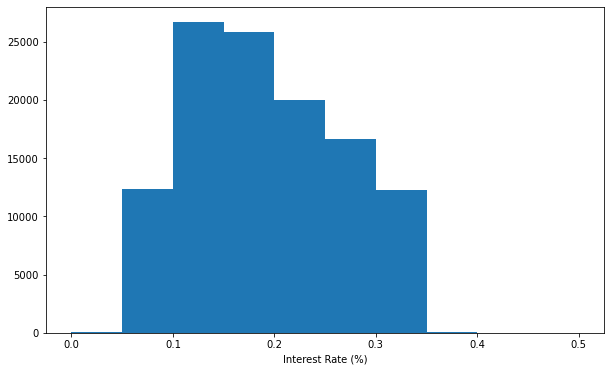

In [12]:
#Plot displaying BorrowerRate on a normal scale 
bins = np.arange(0, df_loan['BorrowerRate'].max()+0.05,0.05)

plt.figure(figsize =(10,6))
plt.hist(data = df_loan , x = 'BorrowerRate', bins=bins) 
plt.xlabel('Interest Rate (%)') ;


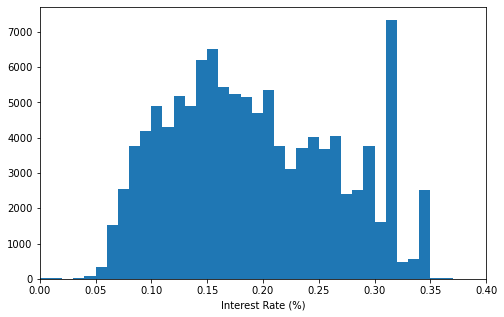

In [13]:
binsize = 0.01
bins = np.arange(0, 0.40, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerRate', bins = bins)
plt.xlim([0,0.4])
plt.xlabel('Interest Rate (%)')
plt.show()

The plot has a bulky distribution with majority of the rate on the lower scale and a few peaks as well skewed to the left side. When plotted on the log scale it appears to be slightly bimodal with the first peak at O.14 and 0.15 followed by a very  huge  peak at 0.32 .

Lets take a look at an influencing variable: LoanOriginalAmount

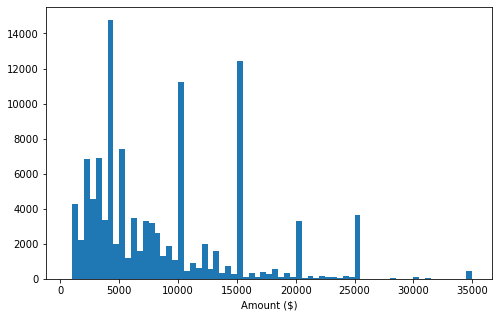

In [14]:
#Distribution of amount Given as loan

bins = np.arange(500, df_loan['LoanOriginalAmount'].max()+500,500 )

plt.figure(figsize=(8,5))
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('Amount ($)')
plt.show();

The plot appears to be too skewed to the left so a little digging would be helpful

In [15]:
np.log10(df_loan['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

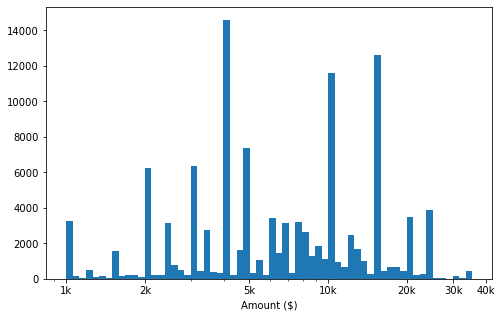

In [16]:
#Investigating further with a smaller binsize
log_binsize = 0.025
bins = 10**np.arange(3, np.log10(df_loan['LoanOriginalAmount'].max())+log_binsize,log_binsize )

plt.figure(figsize=(8,5))
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins=bins)
plt.xscale('log')
plt.xticks([1e3,2e3,5e3,1e4,2e4,3e4,4e4],['1k','2k','5k','10k','20k','30k','40k'])
plt.xlabel('Amount ($)')
plt.show();

With the Loan Amount on a log scale the distribution is evenly dispersed with some peaks at (1k, 2k,4.5k,10k,18k) and then slopes downward after a few little peaks. 

Lets move ahead to look into the variable ProsperRating (Alpha)

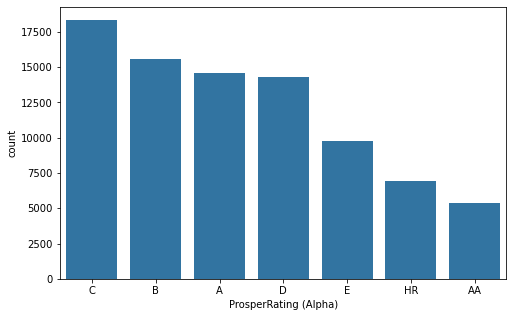

In [17]:
#Lets plot ProsperRating
#Setting the color for the bars as one 
base_color = sb.color_palette()[0]

#Counting the frequency of each unique value and arranging the in descending order
#structuring the bars in an orderly manner
Score = df_loan['ProsperRating (Alpha)'].value_counts()

#Getting the indexes of the Series
Score_count = Score.index

plt.figure(figsize=(8,5))
sb.countplot(data = df_loan, x ='ProsperRating (Alpha)', color= base_color, order= Score_count)

Logic to print the properratings text on the bars
for i in range (Score_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = Score_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')
;

A Look at the StatedMonthlyIncome Variable

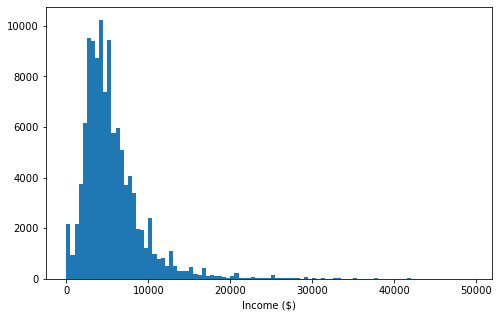

In [18]:
#A histogram to illustrate the distribution
bins = np.arange(0, 50000,500 )

plt.figure(figsize=(8,5))
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Income ($)')
plt.show();

In [19]:
#lets look at the data with the peaks 
df_loan[df_loan.StatedMonthlyIncome == 4500]

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,StatedMonthlyIncome,homeowner,LoanOriginalAmount
70,818044,36,Current,0.24246,0.2049,C,6.0,Retail Management,Employed,4500.0,False,10000
216,771498,36,Current,0.31790,0.2786,E,2.0,Investor,Self-employed,4500.0,True,4000
340,864529,36,Current,0.09837,0.0849,AA,10.0,Waiter/Waitress,Employed,4500.0,False,7000
383,120727,36,Completed,0.10913,0.1022,NaN,NaN,Teacher,Full-time,4500.0,True,4800
571,491750,36,Completed,0.35643,0.3199,E,5.0,Retail Management,Employed,4500.0,True,7500
...,...,...,...,...,...,...,...,...,...,...,...,...
113478,1122719,36,Current,0.13189,0.1039,A,7.0,Skilled Labor,Employed,4500.0,True,15000
113514,1026421,36,Current,0.15223,0.1239,A,8.0,Skilled Labor,Employed,4500.0,True,12000
113527,831070,36,Current,0.25371,0.2159,C,3.0,Administrative Assistant,Full-time,4500.0,False,6000
113720,107157,36,Completed,0.16717,0.1600,NaN,NaN,Sales - Commission,Full-time,4500.0,True,8000


It appears that quite a number of the borrowers withing this peak are mostly employed either full time or self employed .

Lets see a distribution of the BorrowerAPR

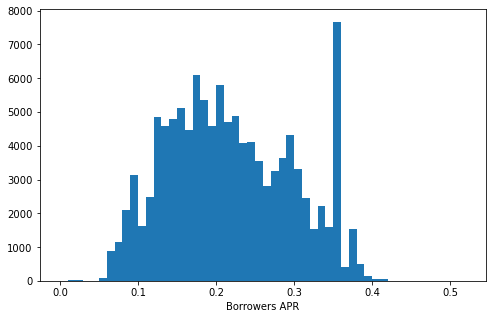

In [20]:
#Plot of the Borrowers APR on the loan
bins = np.arange(0, df_loan['BorrowerAPR'].max()+0.01,0.01 )

plt.figure(figsize=(8,5))
plt.hist(data = df_loan, x = 'BorrowerAPR', bins=bins)
plt.xlabel('Borrowers APR')
plt.show();

The distribution is quite centered with majority of borrowers APR between 0.1 and 0.3 after which there is a jump at 0.36 .

In [21]:
df_loan[df_loan.BorrowerAPR > 0.42]

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,StatedMonthlyIncome,homeowner,LoanOriginalAmount
18326,1795,36,Defaulted,0.45857,0.4500,NaN,NaN,NaN,NaN,10000.000000,False,3000
22195,1849,36,Chargedoff,0.46201,0.4500,NaN,NaN,NaN,NaN,2916.666667,False,1789
36018,690,36,Completed,0.51229,0.4975,NaN,NaN,NaN,NaN,2838.000000,False,1500
56761,2231,36,Defaulted,0.50633,0.4975,NaN,NaN,NaN,NaN,0.000000,False,3000
82043,1112,36,Defaulted,0.48873,0.4800,NaN,NaN,NaN,NaN,1583.333333,False,3000
103973,1366,36,Defaulted,0.45857,0.4500,NaN,NaN,NaN,NaN,3750.000000,False,2800
105889,481141,36,Chargedoff,0.42395,0.3600,HR,4.0,Administrative Assistant,Employed,2250.000000,False,1000


Looking at the plot one would think there is not representation after the 0.42 but there appears to be just a few that cannot be seen on the plot where the least loanAmount is 1000 and highest being 3000 and most clients defaulting on the loan payment as well .

Having a look at the other variables for anything of interest : ProsperRate (Alpha), EmploymentStatus and homeowner

In [22]:
#Converting ProsperRatings into an ordered categorical type

ordinal_var_dict = {'ProsperRating (Alpha)':['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict :
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = ordinal_var_dict[var])
    df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)



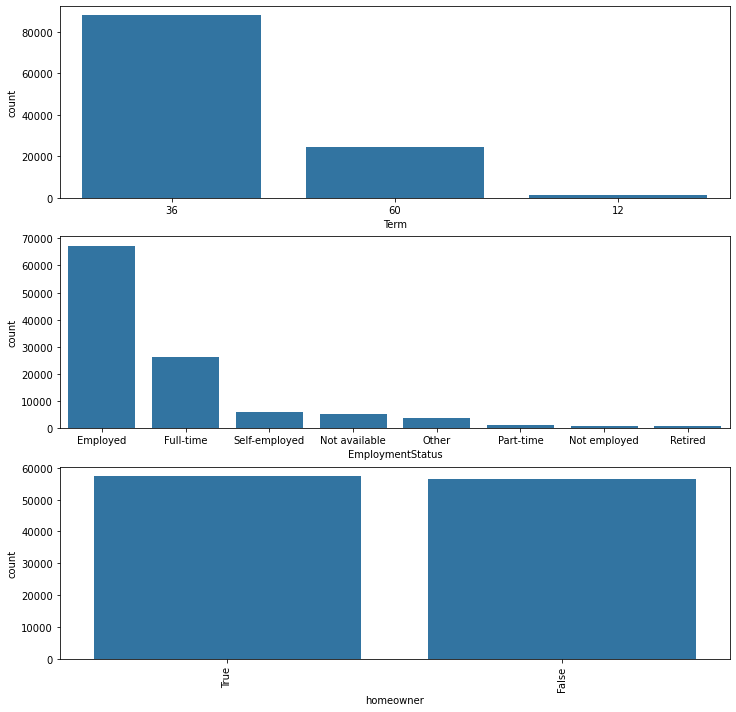

In [26]:
#Looking into the EmploymentStatus ,Term and homeowner variables

fig, ax = plt.subplots(nrows=3, figsize=[12,12])

default_color = sb.color_palette()[0]


#Counting the frequency of each unique value and arranging the in descending order
#structuring the bars in an orderly manner
#Arranging Term plot in order

Term_count = df_loan['Term'].value_counts()

T_count = Term_count.index

#Arranging Employment Status plot in order

Status = df_loan['EmploymentStatus'].value_counts()

status_count = Status.index

#Arranging Occupation plot in order

H_count = df_loan['homeowner'].value_counts()

Hm_count = H_count.index

sb.countplot(data = df_loan, x= 'Term', color= default_color,order = T_count,ax = ax[0])
sb.countplot(data = df_loan, x= 'EmploymentStatus', color= default_color,order = status_count, ax = ax[1])
sb.countplot(data = df_loan, x= 'homeowner', color= default_color,order=Hm_count, ax = ax[2])
plt.xticks(rotation=90)

plt.show ();

The plot show that more loans fall into the 36 months period while majority of Borrowers being employed and followed by full time employees.With the Homeowners plot you see a little more borrowers having homes than those who do not.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The BorrowerRate plot was a little bit skewed to the left and bulky on the low rate however after applying a log scale the distribution sread out looking slighly bimodal and a huge peak at 0.32 .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The monthly icnome of the borrowers was interesting to look at because there was a peak at the 4500 make and quite a number of people also earning huge amounts above 10,000. Most of them self employed with some being attornies, nurses and executives and only loaning small amounts like 1000 which seems a bit unsual considering their incomes. These figures could be a bit made up .

## Bivariate Exploration

Lets look at correlation of pairs of variables.

In [27]:
numeric_var = ['BorrowerRate','BorrowerAPR','LoanOriginalAmount','StatedMonthlyIncome']
categoric_var = ['ProsperRating (Alpha)','Term','EmploymentStatus', 'homeowner']

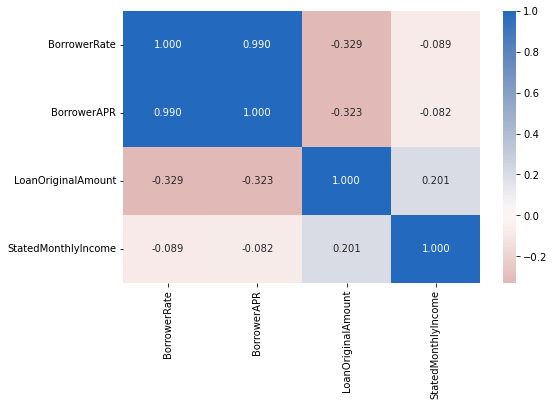

In [28]:
#A plot to trace the correlation

plt.figure(figsize=(8,5))

sb.heatmap(df_loan[numeric_var].corr(), annot = True, fmt ='.3f',
           cmap = 'vlag_r', center= 0) ;

loan_sample.shape= (1000, 12)


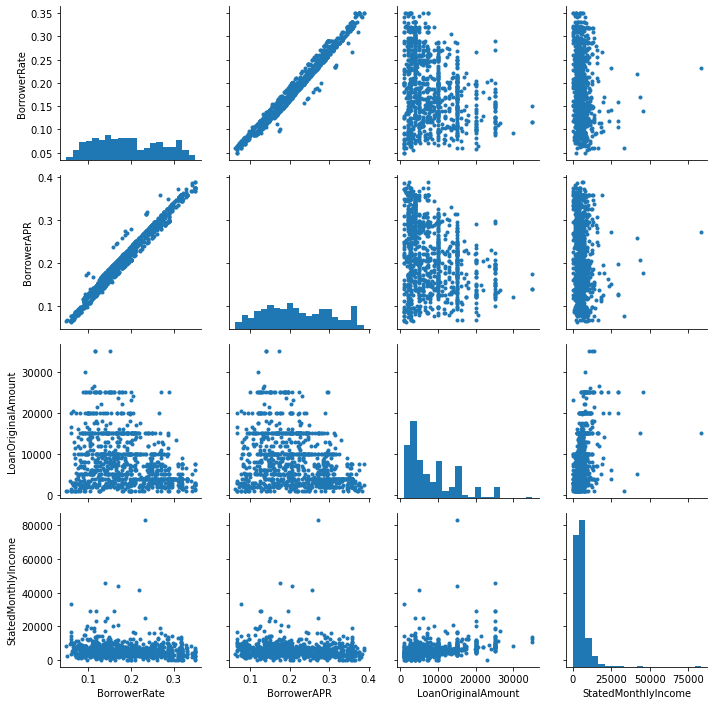

In [39]:
#For this plot we will use aa smaller datasize to improve the clarity of plot and the process
# sample size = 1000

loan_sample = df_loan.sample(n=1000, replace = False)
print("loan_sample.shape=", loan_sample.shape)

g = sb.PairGrid(data=loan_sample, vars = numeric_var)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, marker='.') ;

Lets look to see if BorrowerRate and BorrowerAPR correlate with other variables

<Figure size 576x576 with 0 Axes>

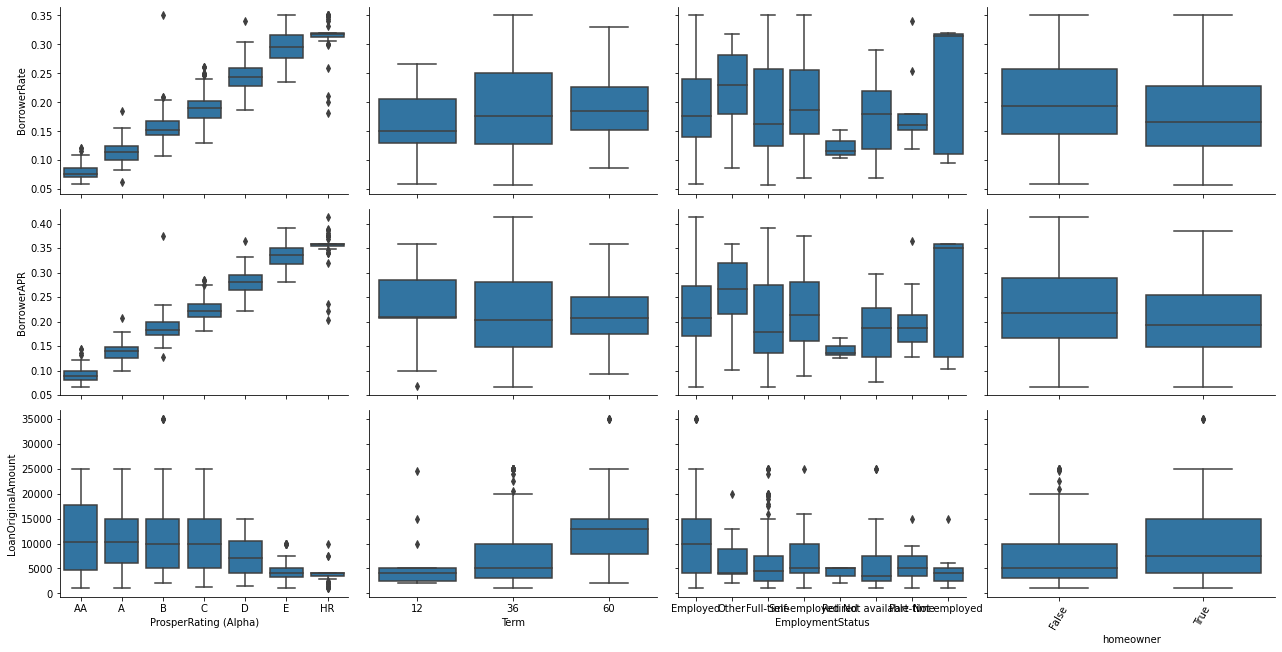

In [30]:
#Plot matrix for the numeric value and the categorical value
#Decided to use the same sample size from the plot above 

loan_sample = df_loan.sample(n=1000, replace = False)

def boxgrid(x,y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x = x,y = y, color = default_color)

plt.figure(figsize=(8,8))
g = sb.PairGrid(data= loan_sample, y_vars =['BorrowerRate','BorrowerAPR','LoanOriginalAmount'], x_vars= categoric_var,
                 height = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=60)
plt.show() ;


Comparing the Groupings in the prosper ratings against the loan amount it can be seen that the higher groups all have a median of 10000 and all but the A group have a mininum value of 1000.
The terms of the loan show that the 12 months term has the lowest median among the 3 comparisons and the 60 months term having the highest medians but not the maximum value for the Borrowerrate and the BorrowerAPR.
The borrowers who are not homeowner show a larger representation withthe Rate and APR category having the higher median and showing a number of outliers from both groups in the Loan amount .

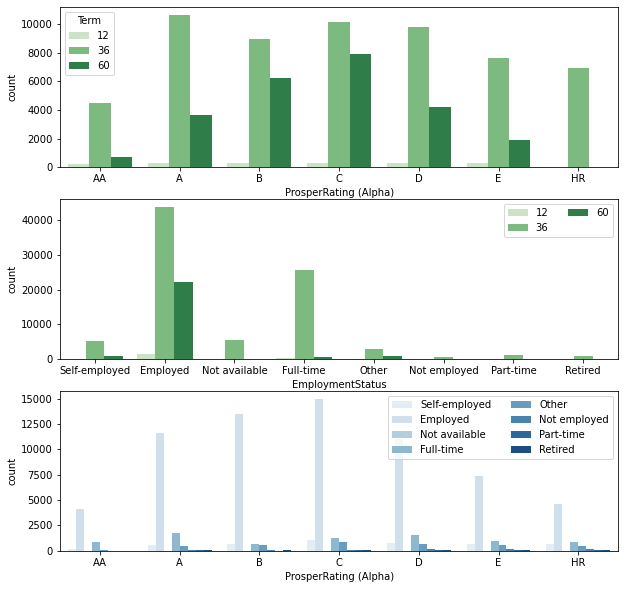

In [31]:
#Let now concentrate on the categorical variables
#ProosperRating (Alpha), Term, EmploymentStatus

plt.figure(figsize=(10,10))

#The First subplot ProsperRating (Alpha)vrsTerm
plt.subplot(3,1,1)
sb.countplot(data = df_loan, x ='ProsperRating (Alpha)', hue ='Term' , palette= 'Greens')

#The second plot EmploymentStatus vrs Term
ax = plt.subplot(3,1,2)
sb.countplot(data =df_loan, x='EmploymentStatus', hue= 'Term', palette= 'Greens')
#legend is introduced to reduce overlapping
ax.legend(ncol=2)
             
#The third plot ProsperRating vrs EmploymentStatus
ax = plt.subplot(3,1,3)
sb.countplot(data = df_loan, x='ProsperRating (Alpha)', hue='EmploymentStatus', palette= 'Blues')
#Legend is rearranged to avoid overlapping
ax.legend(loc= 1, ncol= 2) ;

Generally more of the interaction is between 36 and 60 months but much more with the A and C prosperRating that compared to the employed and the full time employees. Also see that majority of the the self employed borrower are found in the B,C,D Prosper ratings.

Looking closer at BorrowerRate and LoanOriginal Amount

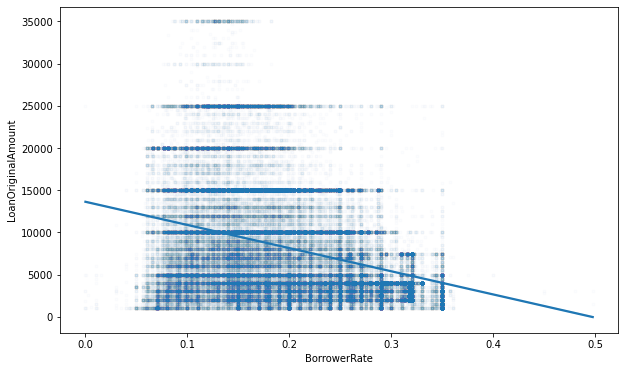

In [38]:
#Scatter plot of BorrowerRate and LoanOriginalAmount with a log transformation of LoanAmount

plt.figure(figsize= (10,6))
sb.regplot(data = df_loan, x = 'BorrowerRate', y='LoanOriginalAmount',marker='.', scatter_kws= {'alpha':0.01});



This plot shows big sizes of the loan range and also illustrates that as the rate range increases the Original loan also decreases. Depicting a negative relating between the two variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> BorrowerRate and BorrowerAPR appear to have a positive relationship compared to the other variables . Initially I was of the view that LoanOriginalAmount could influence the BorrowerRate greatly but I was somehow proved wrong in the plot . And also a negative relationship between LoanAmoung and the BorrowerRate as the scatter plot presents that the lower the LoanAmount the more the rate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I plotted the BorrowerRate and the ProsperRating and it did have a positive relationship that is the higher your ProsperRating which is,a custom risk score built using historical Prosper data the lower your rate. The score ranges from 1-10, with 10 being the best, or lowest risk score,the lower the BorrowerRate. By the plotting it appears to be effective as well .

## Multivariate Exploration

The main focus in this session of the analysis is to mainly look at how ProsperRating and Homeownership could influence LoanAmount and BorrowerRate

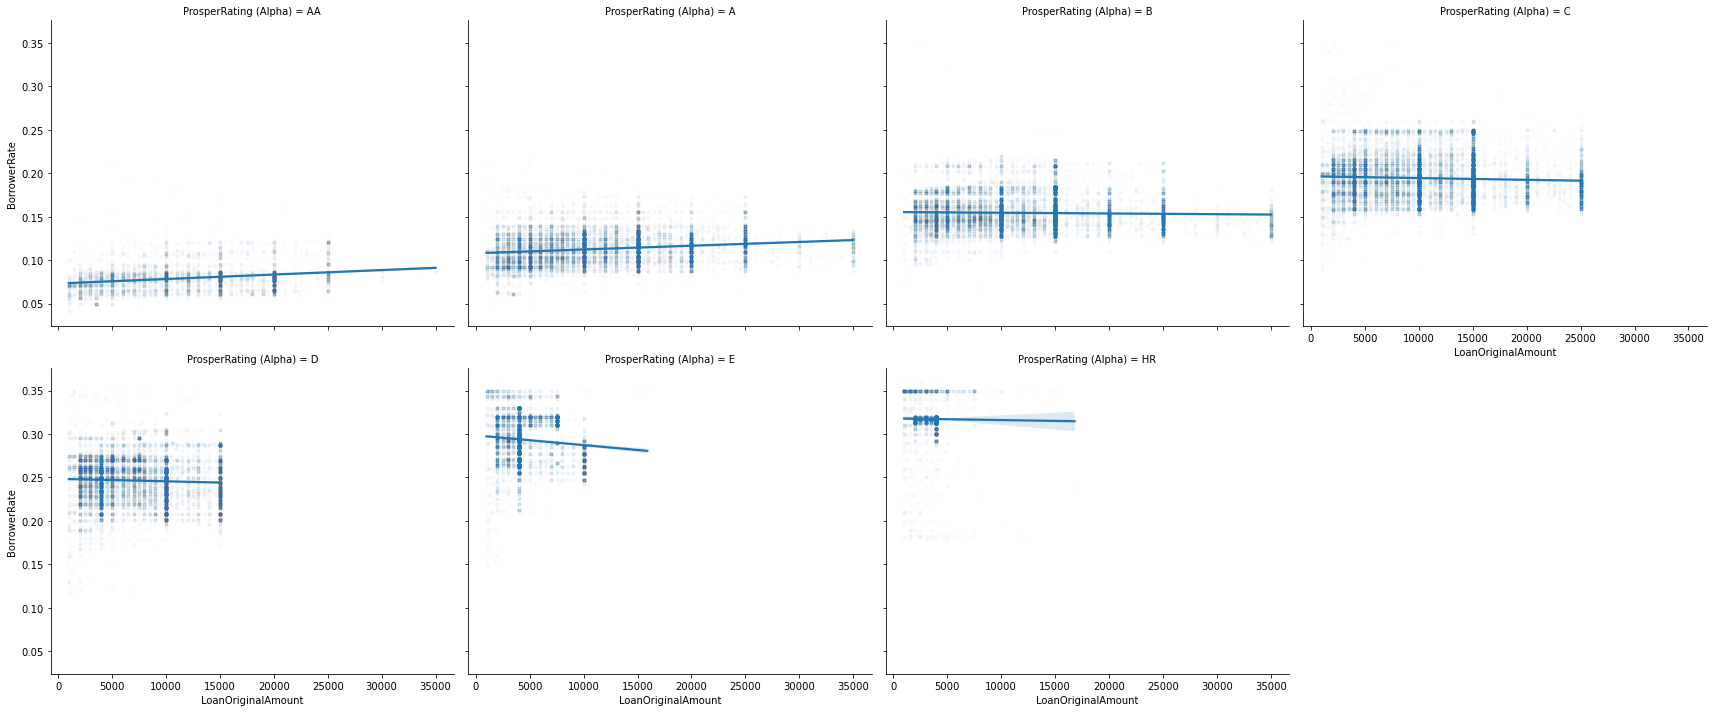

In [35]:
#The influence of ProsperRating on BorrowerRate and LoanAmount

g = sb.FacetGrid(data = df_loan, aspect=1.2, height= 5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04,marker= '.', scatter_kws={'alpha':0.01})
g.add_legend();


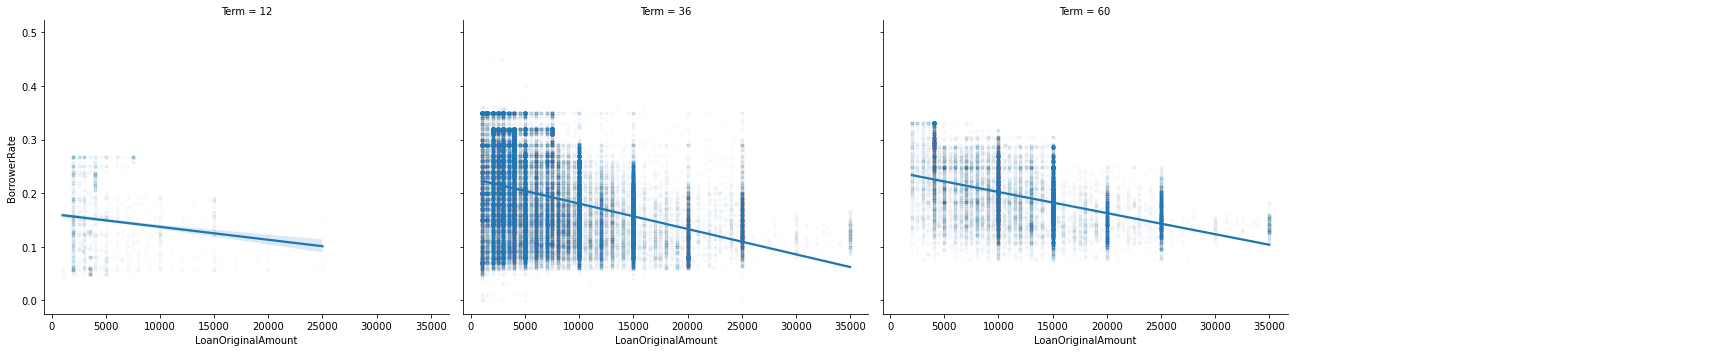

In [36]:
g = sb.FacetGrid(data = df_loan, aspect=1.2, height= 5, col='Term', col_wrap=4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04,marker='.', scatter_kws={'alpha':0.01})
g.add_legend();

As can be seen in the plot above there are a lot of loans given for the period of 36 months and as the Loan Amount increases the rate decreases as well which is the the best among the three and expected because if you are taking a low amount and for a short period or extended period your aret should be different. The interaction between the Ratings and Amount and Rate is not what I imagine because it seems there is a positive relationship with the low rating (E), as the rate decreases as the loan Amount increases and this could be a strategy to encourage borrowing among the low rated.

Lets take a look at another variable which could be more insightful

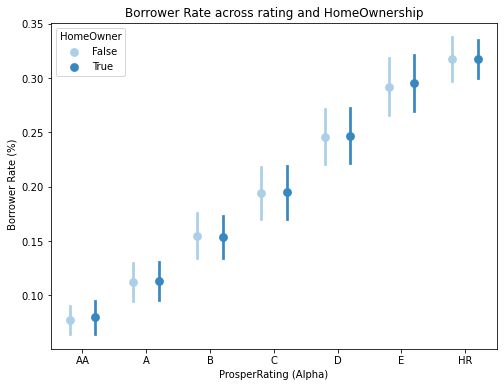

In [40]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'homeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower Rate across rating and homewnership')
plt.ylabel(' Borrower Rate (%)')
ax.set_yticklabels([],minor = True);

Interestingly this plot clearly presents the interaction between homeowners and Prosper Ratings with respect to the Borrower rate. It appears that the lowest Borrower rates are recieved by those with very good Prosper ratings who are also Homeowners because  being a homeowner means you have a mortgage on your credit profile or provide documentation confirming they are a homeowner and the homes can be claimed in case of a default.

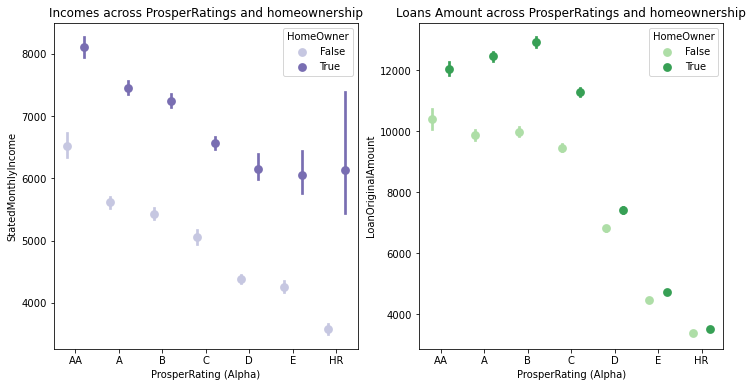

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'homeowner',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('Incomes across ProsperRatings and homeownership')
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'homeowner',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('Loans Amount across ProsperRatings and homeownership');

There appear to be a pattern here where most of the better rated clients also have high monthly incomes and happen to be homeowners as well compared to non homeowners. The plot also illustrates being a home owner with better ratings can give youaccess to a higher loan amount .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I decided to dig deeper with my analyses of the BorrowerRate and the LoanAmount by comparing the influences ofthe other categorical variables.The plots showed how Prosper Rating has a negative correlation with the rate and the loan as rates increases extensively with better ratings. I also furtherd the analyses by comparing with the homeowner variable and it showed a positive impact on the rates .

### Were there any interesting or surprising interactions between features?

> It was interetsing to see that the Prosper Ratings could influence the BorrowerRate on loans given out as most of the ratings with AA,A and B recieved lower rates compared to rating that follower afterwards.additionally the point plot points out interestingly that there is an interacting between Homeowners and the Borrower rate as more homeowners recieve relatively lower rates.